In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import camb
from camb import model, initialpower
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)   #H0= hubble parameter today in km/s    ombh2=physical density in baryons omch2=physical density in cold dark matter
#trovo densità diverse...
pars.InitPower.set_params(ns=0.965)  #ns = scalar spectra index (inflaction)


class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.965
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [3]:
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.7,1.4,2], kmax=2.0)  

pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)   

Note: redshifts have been re-sorted (earliest first)


In [4]:
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200) #nota, le z vengono ordinate


In [5]:
H0 = results.hubble_parameter(0)    #parametri di hubble
h = H0/100

kh = kh/h  #H0 = 70km/(s*Mpc) h=0.7 ma non era senza unità di misura?
pk = pk*h**3

In [6]:
bias = 1+ np.array(z)*0.84   #funzione di bias delle galassie
bias[1]

2.176

TypeError: not all arguments converted during string formatting

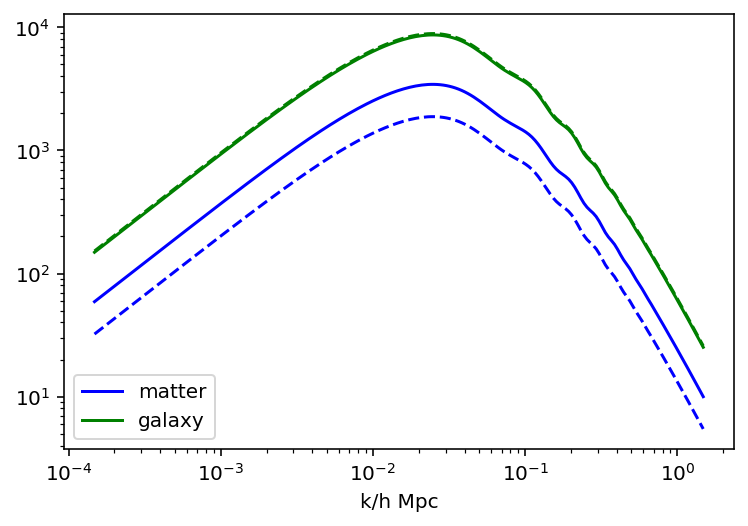

In [7]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])): #cicla sulle z e sulle righette. Ogni grafico ha una zeta e una lineetta diversa
    plt.loglog(kh, pk[i,:], color='b', ls = line)
    plt.loglog(kh, pk[i,:]*(bias[i])**2, color='g', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['matter','galaxy'], loc='lower left');
plt.title('Total Matter power at z=%s and z= %s'%tuple(z));   

#se voglio aggiungere barre d'errore devo usare un altro modo per stampare le cose a video

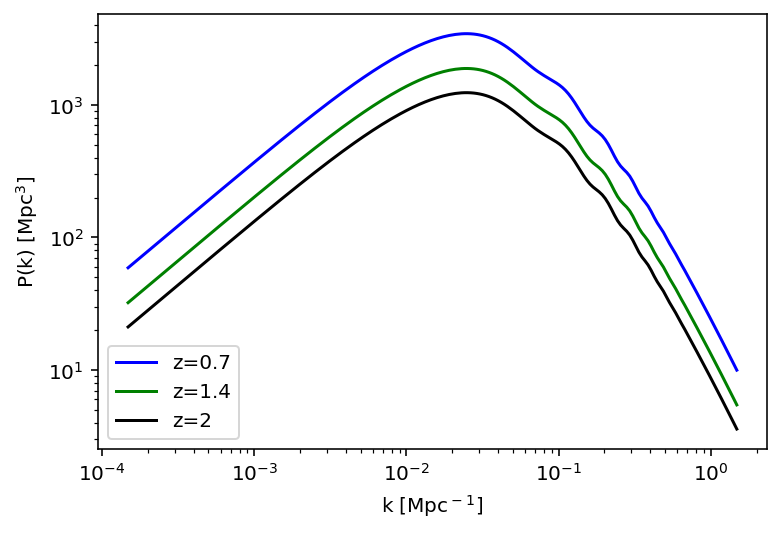

In [8]:
plt.loglog(kh, pk[0,:], color='b', ls = '-')
plt.loglog(kh, pk[1,:], color='g', ls = '-')
plt.loglog(kh, pk[2,:], color='black', ls = '-')

plt.xlabel('k [Mpc$^-$$^1$]');
plt.ylabel('P(k) [Mpc$^3$]');
plt.legend(['z=0.7','z=1.4','z=2'], loc='lower left');

Cosa manca?
- inserire il redshift space distortion
- inserire le barre di errore